In [39]:
from roboflow import Roboflow
from ultralytics import YOLO
import os
import torch

In [2]:
SECRET_KEY = os.environ.get("SECRET_KEY")

In [ ]:
# New dataset

from roboflow import Roboflow
rf = Roboflow(api_key="gyvgseqpEZm5hH7E0cqd")
project = rf.workspace("myproject-dua5p").project("gauge-detection-5l4ey")
dataset = project.version(2).download("yolov8")


In [4]:
rf = Roboflow(api_key=SECRET_KEY)
project = rf.workspace("myproject-dua5p").project("gauge-detection-5l4ey")
dataset = project.version(1).download("yolov8", location="dataset")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to dataset in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 6427.77it/s]


In [6]:
# Load a model
model = YOLO("yolov8n.pt")  # build a new model from scratch
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="dataset/data.yaml", epochs=200)  # train the model

New https://pypi.org/project/ultralytics/8.0.167 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.11.5 torch-2.0.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

In [8]:
# Evaluate on validation data
model = YOLO("runs/detect/train/weights/best.pt")
model.val(data="dataset/data.yaml")

Ultralytics YOLOv8.0.134 🚀 Python-3.11.5 torch-2.0.1 CPU
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /Users/paramatephuengtrakul/project2023/MLengineer/Dial-gauge-detect/dataset/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 2548.72it/s]
val: New cache created: /Users/paramatephuengtrakul/project2023/MLengineer/Dial-gauge-detect/dataset/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]
                   all         20         38          0          0          0          0
Speed: 2.2ms preprocess, 152.7ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/val2


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: []
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x2aff58750>
fitness: 0.0
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([], dtype=float64)
names: {0: 'base', 1: 'tip'}
plot: True
results_dict: {'metrics/precision(B)': 0.0, 'metrics/recall(B)': 0.0, 'metrics/mAP50(B)': 0.0, 'metrics/mAP50-95(B)': 0.0, 'fitness': 0.0}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 2.1701574325561523, 'inference': 152.6822566986084, 'loss': 8.344650268554688e-05, 'postprocess': 4.551947116851807}

In [122]:
model = YOLO("runs/detect/train/weights/best.pt")
results = model.predict(source="dataset/train/images/IMG_7129_mov-28_jpg.rf.bb8fb13007f1b8926e16ae71d235e31b.jpg", show=True)

FileNotFoundError: /Users/paramatephuengtrakul/project2023/MLengineer/Dial-gauge-detect/dataset/train/images/IMG_7129_mov-28_jpg.rf.bb8fb13007f1b8926e16ae71d235e31b.jpg does not exist

In [10]:
model = YOLO("runs/detect/train3/weights/best.pt")
results = model.predict(source="datasets/train/images/IMG_7129_mov-32_jpg.rf.bd95d104bd7aa90ddb12cd0cc832ca64.jpg", show=False)


image 1/1 /Users/paramatephuengtrakul/project2023/MLengineer/Dial-gauge-detect/datasets/train/images/IMG_7129_mov-32_jpg.rf.bd95d104bd7aa90ddb12cd0cc832ca64.jpg: 640x640 1 base, 1 tip, 102.3ms
Speed: 2.2ms preprocess, 102.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


In [13]:
results

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'base', 1: 'tip'}
 orig_img: array([[[211, 215, 226],
         [211, 215, 226],
         [211, 215, 226],
         ...,
         [216, 225, 234],
         [216, 225, 234],
         [216, 225, 234]],
 
        [[210, 214, 225],
         [210, 214, 225],
         [210, 214, 225],
         ...,
         [215, 224, 233],
         [215, 224, 233],
         [215, 224, 233]],
 
        [[211, 215, 226],
         [211, 215, 226],
         [211, 215, 226],
         ...,
         [213, 222, 231],
         [213, 222, 231],
         [213, 222, 231]],
 
        ...,
 
        [[ 86,  81,  82],
         [ 86,  81,  82],
         [ 85,  80,  81],
         ...,
         [ 93, 129, 145],
         [ 88, 127, 142],
         [ 84, 125, 140]],
 
        [[ 86,  81,  82],
         [ 86,  81,  82],
         [ 86,  81,  82],
        

In [24]:
for result in results:
    boxes = result.boxes
    names = result.names

In [125]:
boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[329.1517, 397.7896, 391.4927, 498.9395,   0.8895,   0.0000],
        [155.0330, 346.3175, 167.4685, 367.2303,   0.6950,   1.0000]])
cls: tensor([0., 1.])
conf: tensor([0.8895, 0.6950])
data: tensor([[329.1517, 397.7896, 391.4927, 498.9395,   0.8895,   0.0000],
        [155.0330, 346.3175, 167.4685, 367.2303,   0.6950,   1.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[360.3222, 448.3646,  62.3409, 101.1499],
        [161.2507, 356.7739,  12.4355,  20.9128]])
xywhn: tensor([[0.5630, 0.7006, 0.0974, 0.1580],
        [0.2520, 0.5575, 0.0194, 0.0327]])
xyxy: tensor([[329.1517, 397.7896, 391.4927, 498.9395],
        [155.0330, 346.3175, 167.4685, 367.2303]])
xyxyn: tensor([[0.5143, 0.6215, 0.6117, 0.7796],
        [0.2422, 0.5411, 0.2617, 0.5738]])

In [124]:
len(boxes)

2

In [25]:
names

{0: 'base', 1: 'tip'}

In [128]:
"tip" in names.values()

True

In [52]:
keys = list(names.keys())
vals = list(names.values())
keys, vals

([0, 1], ['base', 'tip'])

In [54]:
keys[vals.index('base')]

0

In [19]:
boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[323.2845, 387.3205, 382.9477, 485.1263,   0.8619,   0.0000],
        [195.4543, 193.5239, 207.8334, 214.5670,   0.7915,   1.0000]])
cls: tensor([0., 1.])
conf: tensor([0.8619, 0.7915])
data: tensor([[323.2845, 387.3205, 382.9477, 485.1263,   0.8619,   0.0000],
        [195.4543, 193.5239, 207.8334, 214.5670,   0.7915,   1.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[353.1161, 436.2234,  59.6631,  97.8058],
        [201.6438, 204.0455,  12.3791,  21.0432]])
xywhn: tensor([[0.5517, 0.6816, 0.0932, 0.1528],
        [0.3151, 0.3188, 0.0193, 0.0329]])
xyxy: tensor([[323.2845, 387.3205, 382.9477, 485.1263],
        [195.4543, 193.5239, 207.8334, 214.5670]])
xyxyn: tensor([[0.5051, 0.6052, 0.5984, 0.7580],
        [0.3054, 0.3024, 0.3247, 0.3353]])

In [22]:
boxes.data

tensor([[323.2845, 387.3205, 382.9477, 485.1263,   0.8619,   0.0000],
        [195.4543, 193.5239, 207.8334, 214.5670,   0.7915,   1.0000]])

In [28]:
boxes.xyxy

tensor([[323.2845, 387.3205, 382.9477, 485.1263],
        [195.4543, 193.5239, 207.8334, 214.5670]])

In [40]:
xywh = boxes.xywh.cpu().detach().numpy()

In [59]:
def get_idx_class(class_name, classes=names):
    idx = list(names.keys())
    classes = list(names.values())
    position = classes.index(class_name)
    index_class = idx[position]
    return index_class

In [61]:
get_idx_class("base")

0

In [41]:
xywh

array([[     353.12,      436.22,      59.663,      97.806],
       [     201.64,      204.05,      12.379,      21.043]], dtype=float32)

In [44]:
x = xywh[0][0]
y = xywh[0][1]
print(x, y)

353.1161 436.2234


In [62]:
tip = xywh[get_idx_class("tip")]
base = xywh[get_idx_class("base")]

In [68]:
x_t, y_t, w, h = tip
x_t, y_t

(201.64384, 204.04547)

In [67]:
x_b, y_b, w_b, h_b = base
x_b, y_b

(353.1161, 436.2234)

In [77]:
import cv2
import matplotlib.pyplot as plt
import math

In [80]:
dx = x_b - x_t
dy = y_b - y_t
theta = math.atan2(dy, dx)
theta = math.degrees(theta)
theta = round(theta)
theta

57

In [99]:
x_b, x_t

(353.1161, 201.64384)

In [101]:
dx = x_t - x_b
dy = y_t - y_b
# dx, dy
theta = math.atan2(dy, dx)
theta = math.degrees(theta)
theta = round(theta)
theta

-123

In [96]:
dx = 0
dy = -1
theta = math.atan2(dy, dx)
theta = math.degrees(theta)
theta = round(theta)
theta

-90

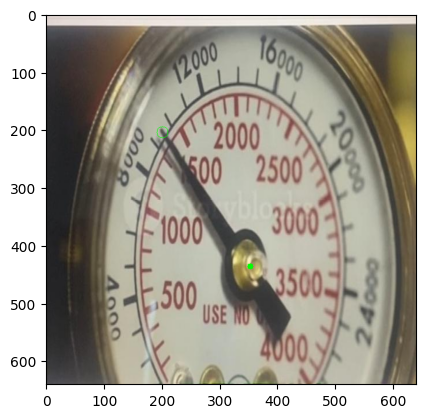

In [76]:
%matplotlib inline
img = cv2.imread("datasets/train/images/IMG_7129_mov-32_jpg.rf.bd95d104bd7aa90ddb12cd0cc832ca64.jpg")





img = cv2.circle(img, (int(x_b), int(y_b)), 5, (0,255,0), -1)
img = cv2.circle(img, (int(x_t), int(y_t)), 10, (0,255,0), 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
print(img)

[[[211 215 226]
  [211 215 226]
  [211 215 226]
  ...
  [216 225 234]
  [216 225 234]
  [216 225 234]]

 [[210 214 225]
  [210 214 225]
  [210 214 225]
  ...
  [215 224 233]
  [215 224 233]
  [215 224 233]]

 [[211 215 226]
  [211 215 226]
  [211 215 226]
  ...
  [213 222 231]
  [213 222 231]
  [213 222 231]]

 ...

 [[ 86  81  82]
  [ 86  81  82]
  [ 85  80  81]
  ...
  [ 93 129 145]
  [ 88 127 142]
  [ 84 125 140]]

 [[ 86  81  82]
  [ 86  81  82]
  [ 86  81  82]
  ...
  [ 93 129 145]
  [ 88 127 142]
  [ 85 126 141]]

 [[ 86  81  82]
  [ 86  81  82]
  [ 86  81  82]
  ...
  [ 91 130 145]
  [ 88 127 142]
  [ 85 126 141]]]


In [102]:
import numpy as np

In [105]:
x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])
np.arctan2(y,x) * 180/np.pi

array([       -135,         -45,          45,         135])

In [141]:

def angle_from_six_oclock(x, y):
    # Calculate the angle in radians using arctan2
    angle_rad = np.arctan2(y, x)

    # Convert the angle from radians to degrees
    angle_deg = np.degrees(angle_rad)

    # Adjust the angle to have 0 degrees at 6 o'clock (90 degrees)
    angle_deg = (angle_deg + 90) % 360

    return angle_deg

# Example usage:
x = -1  # Example x-coordinate
y = -1  # Example y-coordinate
clockwise_angle = angle_from_six_oclock(x, y)
print(f"Clockwise angle: {clockwise_angle:.2f} degrees")

Clockwise angle: 315.00 degrees
